In [70]:
import numpy as np
import dataloader
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import models
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision
import os
import time
from torch_geometric.nn import GATv2Conv, global_mean_pool
# reload library
import importlib
import cv2
#import utils as ut
import pandas as pd
import DataDLC
from torch_geometric.data import Data, DataLoader
import tqdm


# PyTorch TensorBoard support
from torch.utils.tensorboard import SummaryWriter
from datetime import datetime

In [71]:
importlib.reload(dataloader)
importlib.reload(DataDLC)
importlib.reload(models)

<module 'models' from 'c:\\Users\\jalvarez\\Documents\\Code\\GitHubCOde\\Behavioral_Tagging_of_Mice_in_multiple_Mice_dataset_using_Deep_Learning\\src\\models.py'>

In [97]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# Load the data
dataset = torch.load(r'c:\Users\jalvarez\Documents\Data\LargeDataset\entire_dataset.pkl', map_location=device)

cpu


In [329]:
# Get the first graph in the dataset
data = dataset[50035].clone()

In [340]:
data.behaviour_names

Index(['General_Contacts', 'Sniffing_R', 'Sniffing_head_R', 'Sniffing_other_R',
       'Sniffing_anal_R', 'Poursuit_R', 'Dominance_R', 'Rearing_R',
       'Grooming_R', 'Sniffing_V', 'Sniffing_head_V', 'Sniffing_other_V',
       'Sniffing_anal_V', 'Poursuit_V', 'Dominance_V', 'Rearing_V',
       'Grooming_V'],
      dtype='object')

In [330]:
data.frame_mask

tensor([76, 77, 78, 79, 80, 76, 77, 78, 79, 80, 76, 77, 78, 79, 80, 76, 77, 78,
        79, 80, 76, 77, 78, 79, 80, 76, 77, 78, 79, 80, 76, 77, 78, 79, 80, 76,
        77, 78, 79, 80, 76, 77, 78, 79, 80, 76, 77, 78, 79, 80, 76, 77, 78, 79,
        80, 76, 77, 78, 79, 80, 76, 77, 78, 79, 80, 76, 77, 78, 79, 80, 76, 77,
        78, 79, 80, 76, 77, 78, 79, 80, 76, 77, 78, 79, 80, 76, 77, 78, 79, 80,
        76, 77, 78, 79, 80, 76, 77, 78, 79, 80, 76, 77, 78, 79, 80, 76, 77, 78,
        79, 80, 76, 77, 78, 79, 80, 76, 77, 78, 79, 80, 76, 77, 78, 79, 80, 76,
        77, 78, 79, 80, 76, 77, 78, 79, 80, 76, 77, 78, 79, 80, 76, 77, 78, 79,
        80, 76, 77, 78, 79, 80, 76, 77, 78, 79, 80, 76, 77, 78, 79, 80, 76, 77,
        78, 79, 80, 76, 77, 78, 79, 80, 76, 77, 78, 79, 80, 76, 77, 78, 79, 80],
       dtype=torch.int32)

In [331]:
node_features = data.x
edge_index = data.edge_index

In [332]:
# Plot the graph
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()
G.add_nodes_from(range(node_features.shape[0]))
G.add_edges_from(edge_index.T.tolist())

In [333]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179))

In [334]:
node_features

tensor([[0.3338, 0.8197, 1.0000, 0.0000],
        [0.3174, 0.7867, 1.0000, 0.0000],
        [0.2888, 0.7757, 1.0000, 0.0000],
        [0.2713, 0.7481, 1.0000, 0.0000],
        [0.2652, 0.7206, 1.0000, 0.0000],
        [0.3854, 0.8353, 1.0000, 0.0000],
        [0.3707, 0.8353, 1.0000, 0.0000],
        [0.3404, 0.8161, 1.0000, 0.0000],
        [0.3271, 0.7999, 1.0000, 0.0000],
        [0.3136, 0.7837, 1.0000, 0.0000],
        [0.3853, 0.7632, 1.0000, 0.0000],
        [0.3761, 0.7601, 1.0000, 0.0000],
        [0.3469, 0.7455, 1.0000, 0.0000],
        [0.3368, 0.7332, 1.0000, 0.0000],
        [0.3312, 0.7173, 1.0000, 0.0000],
        [0.3639, 0.8017, 1.0000, 0.0000],
        [0.3469, 0.8017, 1.0000, 0.0000],
        [0.3259, 0.7774, 1.0000, 0.0000],
        [0.3100, 0.7537, 1.0000, 0.0000],
        [0.2996, 0.7371, 1.0000, 0.0000],
        [0.4178, 0.8484, 1.0000, 0.0000],
        [0.4047, 0.8484, 1.0000, 0.0000],
        [0.3826, 0.8407, 1.0000, 0.0000],
        [0.3630, 0.8233, 1.0000, 0

In [335]:
# The position of the nodes is the node features (first two dimensions), add +1 in x coord for different frames
# Put different colors to the nodes depending on the node features
colors = node_features[:, 3].numpy()
# if colors is 0 -> red, if 1 -> yellow
colors = ['r' if c == 0 else 'y' for c in colors]

# Node sizes
size = 100
# alpha of the edges
alpha = 0.3
# Position of the nodes
pos = node_features[:, :2].numpy()
# Add data.frame_mask to the x coordinate
# Frame difference
frame_x_diff = data.frame_mask.numpy()
# Normalize the frame difference
frame_x_diff = ((frame_x_diff - frame_x_diff.min())*2) / (frame_x_diff.max() - frame_x_diff.min())
pos[:, 0] += frame_x_diff


In [336]:
frame_x_diff

array([0. , 0.5, 1. , 1.5, 2. , 0. , 0.5, 1. , 1.5, 2. , 0. , 0.5, 1. ,
       1.5, 2. , 0. , 0.5, 1. , 1.5, 2. , 0. , 0.5, 1. , 1.5, 2. , 0. ,
       0.5, 1. , 1.5, 2. , 0. , 0.5, 1. , 1.5, 2. , 0. , 0.5, 1. , 1.5,
       2. , 0. , 0.5, 1. , 1.5, 2. , 0. , 0.5, 1. , 1.5, 2. , 0. , 0.5,
       1. , 1.5, 2. , 0. , 0.5, 1. , 1.5, 2. , 0. , 0.5, 1. , 1.5, 2. ,
       0. , 0.5, 1. , 1.5, 2. , 0. , 0.5, 1. , 1.5, 2. , 0. , 0.5, 1. ,
       1.5, 2. , 0. , 0.5, 1. , 1.5, 2. , 0. , 0.5, 1. , 1.5, 2. , 0. ,
       0.5, 1. , 1.5, 2. , 0. , 0.5, 1. , 1.5, 2. , 0. , 0.5, 1. , 1.5,
       2. , 0. , 0.5, 1. , 1.5, 2. , 0. , 0.5, 1. , 1.5, 2. , 0. , 0.5,
       1. , 1.5, 2. , 0. , 0.5, 1. , 1.5, 2. , 0. , 0.5, 1. , 1.5, 2. ,
       0. , 0.5, 1. , 1.5, 2. , 0. , 0.5, 1. , 1.5, 2. , 0. , 0.5, 1. ,
       1.5, 2. , 0. , 0.5, 1. , 1.5, 2. , 0. , 0.5, 1. , 1.5, 2. , 0. ,
       0.5, 1. , 1.5, 2. , 0. , 0.5, 1. , 1.5, 2. , 0. , 0.5, 1. , 1.5,
       2. , 0. , 0.5, 1. , 1.5, 2. , 0. , 0.5, 1. , 1.5, 2. ])

In [337]:
pos

array([[0.33382812, 0.8196646 ],
       [0.81736875, 0.78674585],
       [1.2888422 , 0.7757375 ],
       [1.7712593 , 0.7481292 ],
       [2.2652218 , 0.720575  ],
       [0.3854328 , 0.8353104 ],
       [0.87069535, 0.8353104 ],
       [1.3404125 , 0.8161354 ],
       [1.8271203 , 0.7999396 ],
       [2.3135562 , 0.7836875 ],
       [0.3852922 , 0.76315415],
       [0.8760687 , 0.76011044],
       [1.3468547 , 0.7454729 ],
       [1.8368485 , 0.7332271 ],
       [2.3311672 , 0.71727294],
       [0.36394063, 0.8017375 ],
       [0.8469031 , 0.8017375 ],
       [1.3259437 , 0.77735   ],
       [1.8100094 , 0.7537208 ],
       [2.299614  , 0.73707706],
       [0.4178297 , 0.8484125 ],
       [0.9047125 , 0.8484125 ],
       [1.382586  , 0.84072083],
       [1.8629609 , 0.82331043],
       [2.3393312 , 0.8211646 ],
       [0.417225  , 0.74990416],
       [0.898125  , 0.74990416],
       [1.3723203 , 0.74250627],
       [1.8718922 , 0.7332771 ],
       [2.3634515 , 0.7304396 ],
       [0.

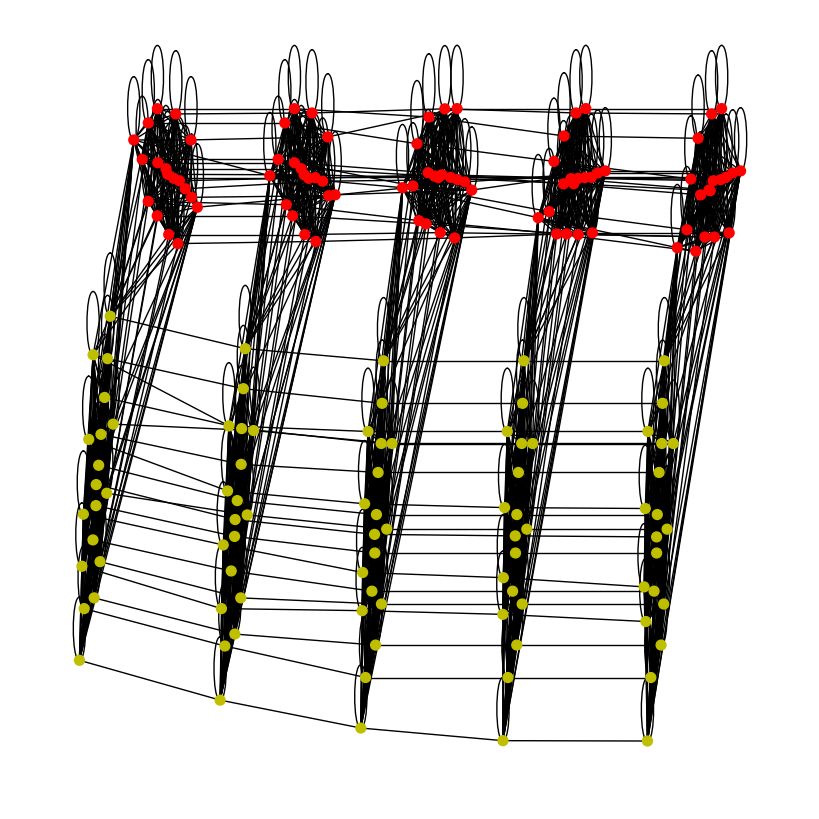

In [338]:
# Plot the graph
plt.figure(figsize=(8, 8))
#pos = nx.spring_layout(G)
#nx.draw(G, pos, node_size=50, node_color=colors, alpha = 0.3)

#nx.draw_networkx_edges(G, pos, alpha=0.2)
nx.draw(G, pos, node_size=50, node_color=colors)
plt.show()